In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
db=pd.read_csv("rischio cuore.csv")
print(db.head())

   id  age  education sex is_smoking  cigsPerDay  BPMeds  prevalentStroke  \
0   0   64        2.0   F        YES         3.0     0.0                0   
1   1   36        4.0   M         NO         0.0     0.0                0   
2   2   46        1.0   F        YES        10.0     0.0                0   
3   3   50        1.0   M        YES        20.0     0.0                0   
4   4   64        1.0   F        YES        30.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP diaBP  heartRate  glucose  \
0             0         0    221.0    148    85       90.0     80.0   
1             1         0    212.0    168    98       72.0     75.0   
2             0         0    250.0    116    71       88.0     94.0   
3             1         0    233.0    158    88       68.0     94.0   
4             0         0    241.0  136,5    85       70.0     77.0   

   TenYearCHD  
0           1  
1           0  
2           0  
3           1  
4           0  


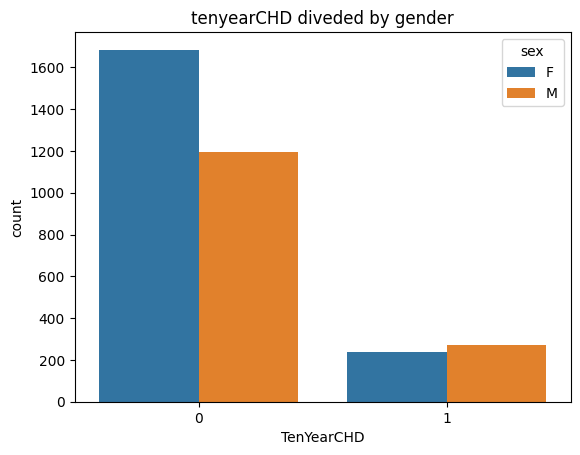

In [2]:
sns.countplot(data=db, x="TenYearCHD",hue="sex")
plt.title("tenyearCHD diveded by gender")
plt.show()
#there are more male with tenyearCHD

In [3]:
#Extracting data about male and female smokers and non-smokers
donnefumatrici=(db[(db["sex"]=="F")&(db["is_smoking"]=="YES")])
print(donnefumatrici.count()["id"])
#776 female smokers
print(db[db["sex"]=="F"].count()["id"]) 
#1923 tot female
print(db[db["sex"]=="M"].count()["id"])
uominifumatori=(db[(db["sex"]=="M")&(db["is_smoking"]=="YES")])
print(uominifumatori.count()["id"])
#tot men are 1467, male smokers  911
personetotali=1923+1467

776
1923
1467
911


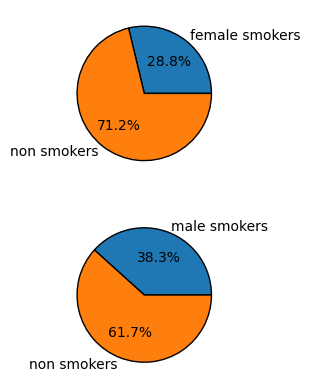

In [4]:
fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
ax1.pie([776,1923],labels=["female smokers","non smokers"], autopct="%1.1f%%", wedgeprops={"edgecolor":"#000000"})
ax2.pie([911,1467],labels=["male smokers","non smokers"], autopct="%1.1f%%",wedgeprops={"edgecolor":"#000000"})
plt.style.use("classic")

#higher percentage of male smokers than female smokers

22.00111234705228
14.056135770234986


Text(0.5, 1.0, 'cigsperday on average')

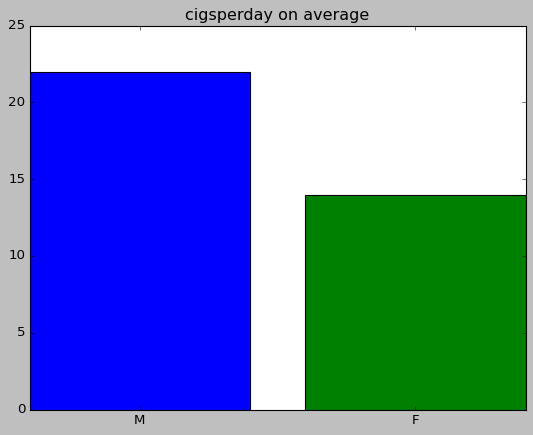

In [5]:
print((db.query("sex=='M' and is_smoking=='YES'"))["cigsPerDay"].mean())
# 22 cigs per day smoked by male smokers
print((db.query("sex=='F' and is_smoking=='YES'"))["cigsPerDay"].mean())
# 14 cigs per day smoked by female smokers
plt.bar("M",22, label="male")
plt.bar("F",14, label="female")
plt.title("cigsperday on average")
#22 cigsperday on average for men against 14 for womens

In [6]:
# db1=(db[["age","totChol"]]).sort_values(["age"])
# fig,(ax1,ax2)=plt.subplots(nrows=2,ncols=1)
# ax2.scatter(db1["age"],db1["totChol"])
# ax2.set_xlabel("age")
# ax2.set_ylabel("totChol")
# print(db1)
# db3=db1["age"].drop_duplicates()
# db2=(db1.groupby("age")).mean()["totChol"]
# ax1.plot(db3[1:-1],db2[1:-1],color="red")
# plt.figure(figsize=(20,200))

# plt.tight_layout()

# it seems there is a relation between age and totChol


education
1.0     8.713666
2.0    10.043699
3.0     7.972527
4.0     9.805405
Name: cigsPerDay, dtype: float64


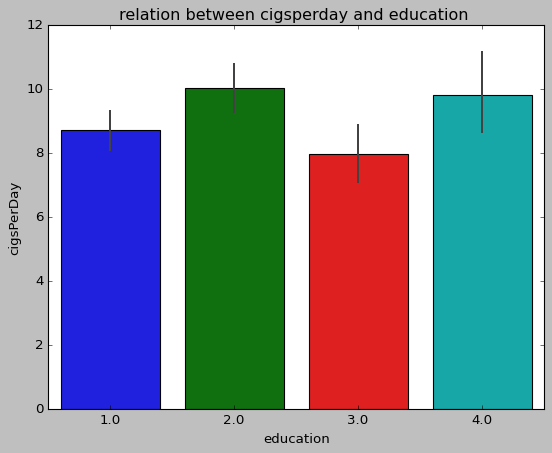

In [7]:
#correlation between education and cigs smoked per day
sns.barplot(x=db["education"], y=db["cigsPerDay"], data=db)
db1=db[["education","cigsPerDay"]].groupby("education").mean()["cigsPerDay"]
plt.title("relation between cigsperday and education ")
print(db1)

Text(0.5, 1.0, 'correlation heatmap')

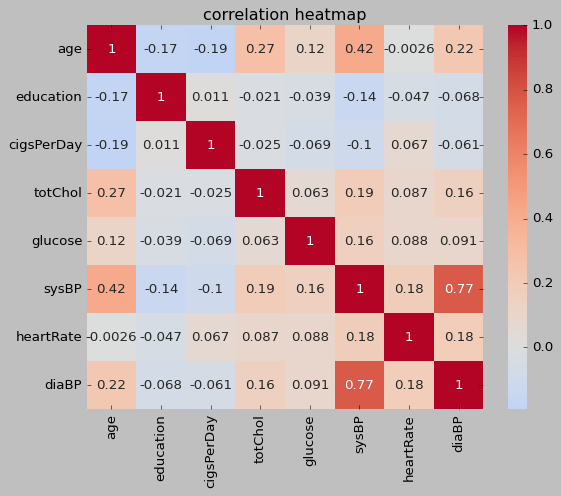

In [8]:
# anylising correlations
db["sysBP"]=pd.to_numeric(db["sysBP"], errors="coerce")
db["diaBP"]=pd.to_numeric(db["diaBP"], errors="coerce")
correlation=db[["age", "education", "cigsPerDay","totChol","glucose","sysBP","heartRate","diaBP"]].corr()
sns.heatmap(correlation,annot=True,  cmap="coolwarm", center=0)
plt.title("correlation heatmap")

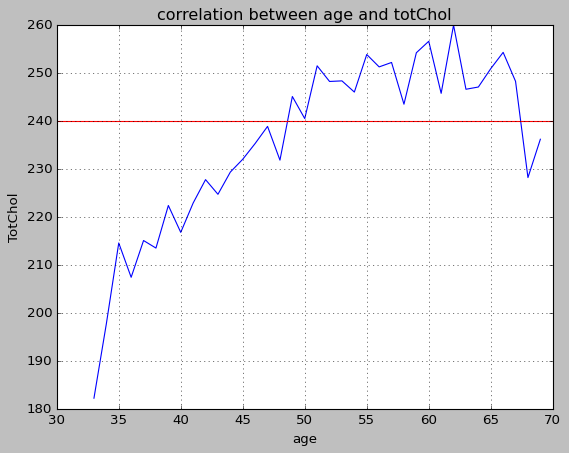

In [9]:

db1=db[["age","totChol"]].groupby("age").mean()["totChol"]
plt.plot(db1[1:-1])
plt.xlabel("age")
plt.ylabel("TotChol")
plt.grid()
plt.title("correlation between age and totChol")
plt.axhline(240,color="red")


In [10]:
import statistics
db1=list((db.sort_values(by="age"))["age"].drop_duplicates())
db2=list(db[["age","totChol"]].groupby("age").mean()["totChol"])
print(statistics.linear_regression(db1[1:-1],db2[1:-1]))
# 1.35 totchol changing on average for one year changing





LinearRegression(slope=1.321487950774841, intercept=168.31792296962834)


LinearRegression(slope=0.9708783118475341, intercept=84.16889091175898)


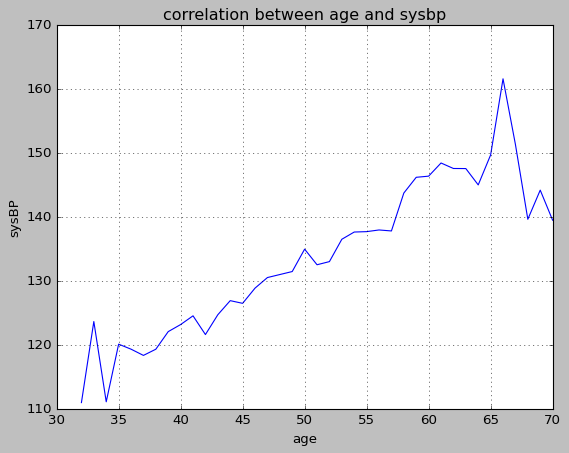

In [11]:
db1=(db[["age", "sysBP"]].groupby("age").mean()["sysBP"])
plt.plot(db1)
plt.xlabel("age")
plt.ylabel("sysBP")
plt.title("correlation between age and sysbp")
age=list(((db[["age", "sysBP"]].groupby("age").mean()["sysBP"]).reset_index())["age"])
sysbp=list(((db[["age", "sysBP"]].groupby("age").mean()["sysBP"]).reset_index())["sysBP"])
print(statistics.linear_regression(age,sysbp))
plt.grid()
# print(db1)

     totChol  sysBP  diaBP
1      113.0  120.0    NaN
2      119.0  117.0    NaN
3      124.0  138.0   91.0
4      126.0  152.0    NaN
5      129.0  109.0   69.0
..       ...    ...    ...
234    432.0  153.0   85.0
235    439.0  145.0   74.0
236    453.0  158.0  108.0
237    464.0  128.0   87.0
238    600.0    NaN   94.0

[238 rows x 3 columns]
LinearRegression(slope=0.08253504708131648, intercept=112.85169194108903)
LinearRegression(slope=0.03389733591595557, intercept=74.75462548543989)


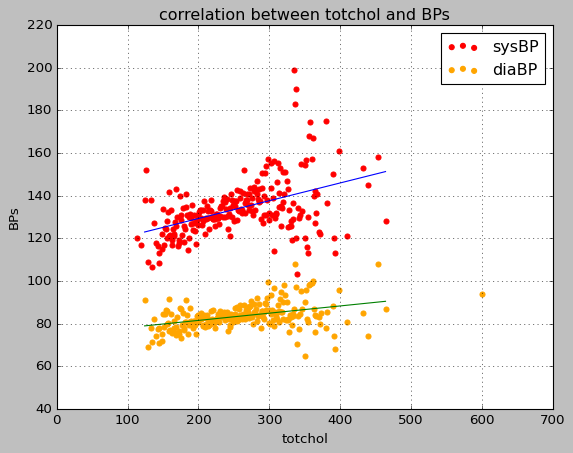

In [12]:
#correlation between chol and BPs
db1=(((db[["totChol","sysBP","diaBP"]]).groupby("totChol").mean()[["sysBP","diaBP"]]).reset_index())[1:-1]
print(db1)
plt.scatter(db1["totChol"],db1["sysBP"], color="red")
plt.scatter(db1["totChol"],db1["diaBP"], color="orange")
plt.title("correlation between totchol and BPs")
plt.xlabel("totchol")
plt.ylabel("BPs")
plt.legend(["sysBP","diaBP"])
db1=db1.dropna()
totchol=list(db1["totChol"])
sys=list(db1["sysBP"])
print(statistics.linear_regression(totchol,sys,proportional=False))
plt.grid()
slope=0.08330971323119321
intercept=112.63812843630973
plt.plot(db1["totChol"], intercept+slope*db1["totChol"])
dia=list(db1["diaBP"])
print(statistics.linear_regression(totchol,dia))
slope1=0.03389733591595557
intercept1=74.75462548543989
plt.plot(db1["totChol"],intercept1+slope1*db1["totChol"])
